<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/BTCS_and_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# other parameters
al = 1
dx = .2 #space mesh size
rho = 1. #conditinal number, to be less than .5 for the stability
dt = rho*(dx**2)/al #time step size

In [0]:
def init(x):
  return np.sin(np.pi*x)

In [0]:
def exact(x, t):
  return np.exp(-np.pi**2*t)*np.sin(np.pi*x)

In [0]:
def ftcs(a,b,nt,dx,dt,rho):
  nx = int((b-a)/dx)
  u = np.zeros((nt,nx))
  
  for x in range(0,nx):
    u[0][x] = init(a+x*dx)
    
  for t in range(0,nt-1):
    for x in range(1,nx-1):
      u[t+1][x] = rho*(u[t][x-1]) + (1-2*rho)*(u[t][x]) + rho*(u[t][x+1])
      
      
  return u

In [0]:
ftcs_sol = ftcs(0,1,200,dx,dt,rho)


In [0]:
def error(a,b,nt,dx,dt,sol):
  nx = int((b-a)/dx)
  e = np.zeros((nt,nx))
  
  for t in range(nt):
    for x in range(nx):
      e[t][x] = np.abs(sol[t][x]-exact(a+x*dx,t*dt))
  return e

In [10]:
err = error(0, 1, 200, dx, dt, ftcs_sol)
superr = np.max(err)
print('the supnorm of error function is ' + str(superr))

the supnorm of error function is 2.609198345490077e+74


[0.  0.2 0.4 0.6 0.8]
[ 0.00000000e+00 -1.21363453e+16  1.71633842e+16 -1.21363453e+16
  3.46333422e-09]
[ 0.00000000e+00  2.92997295e+16 -4.14360748e+16  2.92997295e+16
  2.33368274e-09]
[ 0.00000000e+00 -7.07358043e+16  1.00035534e+17 -7.07358043e+16
  1.57249483e-09]


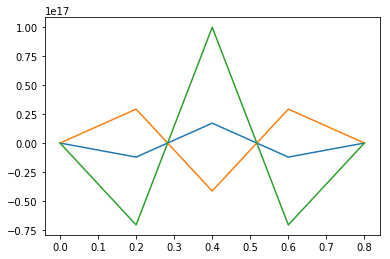

In [11]:
xx = np.arange(0,1,.2)
print(xx)
error1 = np.zeros(5)
for i in range(len(error1)):
  error1[i] = exact(xx[i], 1.92) - ftcs_sol[int(1.92/dt)][i]
print(error1)
error2 = np.zeros(5)
for i in range(len(error2)):
  error2[i] = exact(xx[i], 1.96) - ftcs_sol[int(1.96/dt)][i]
print(error2)
error3 = np.zeros(5)
for i in range(len(error3)):
  error3[i] = exact(xx[i], 2.00) - ftcs_sol[int(2.00/dt)][i]
print(error3)
plt.plot(xx,error1)
plt.plot(xx,error2)
plt.plot(xx,error3)

In [0]:
def btcs(a, b, nt, dx, dt, rho):
  nx = int((b-a)/dx)
  u = np.zeros((nt,nx))
  
  ld = np.repeat(-rho,nx-1)#lower diag
  md = np.repeat(1+2*rho,nx)#main diag
  ud = np.repeat(-rho,nx-1)#upper diag
  
  A = np.diag(ld, -1) + np.diag(md, 0) + np.diag(ud, 1)#matrix
  
  for x in range(0,nx):
    u[0][x] = init(a+x*dx)
  
  for t in range(0,nt-1):
    u[t+1][:] = np.linalg.inv(A).dot(u[t][:])
  
  return u

In [0]:
btcs_sol = btcs(0,1,200,dx,dt,rho)


In [17]:
err = error(0, 1, 200, dx, dt, btcs_sol)
superr = np.max(err)
print('the supnorm of error function is ' + str(superr))

the supnorm of error function is 0.19016094194762306


[0.  0.2 0.4 0.6 0.8]
[-6.12747436e-06 -1.06096336e-05 -1.22493449e-05 -1.06074931e-05
 -6.12401103e-06]
[-4.83258666e-06 -8.36795195e-06 -9.66139735e-06 -8.36650966e-06
 -4.83025298e-06]
[-3.81134094e-06 -6.59986366e-06 -7.62013753e-06 -6.59889180e-06
 -3.80976844e-06]


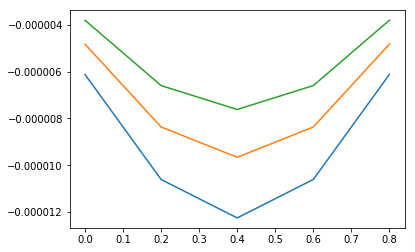

In [19]:
xx = np.arange(0,1,.2)
print(xx)
error1 = np.zeros(5)
for i in range(len(error1)):
  error1[i] = exact(xx[i], 1.92) - btcs_sol[int(1.92/dt)][i]
print(error1)
error2 = np.zeros(5)
for i in range(len(error2)):
  error2[i] = exact(xx[i], 1.96) - btcs_sol[int(1.96/dt)][i]
print(error2)
error3 = np.zeros(5)
for i in range(len(error3)):
  error3[i] = exact(xx[i], 2.00) - btcs_sol[int(2.00/dt)][i]
print(error3)
plt.plot(xx,error1)
plt.plot(xx,error2)
plt.plot(xx,error3)